# Download the inventory data for the following criterias
go through each stations.\
select  HHE stations for BK\
CE network not in IRISDMC. its in ncedc\
if HHE is available download, if not get BHE 

1. HH*
2. BH*
3. HN*
4. EH*

In [6]:
import os
import time
import pandas as pd
from obspy.clients.fdsn import Client
from obspy import UTCDateTime, read_inventory, Inventory, read, Stream

# Read earthquake data
eqdf = pd.read_csv("../Data/above_slab_eq_df.csv", parse_dates=["time"])
eqdf55 = eqdf[eqdf.mag >= 5].reset_index(drop=True)
print(eqdf55[['id', 'mag', 'time']])

# Select an event
eq_idx = int(input("Enter the index of the event you want to plot: "))
eq = eqdf55.iloc[eq_idx]
event_id = eq['id']
print(f"Selected event: {event_id}")

# Create a folder for the event
output_folder = f"../OutputData/{event_id}"
os.makedirs(output_folder, exist_ok=True)

# Get event time
event_time = UTCDateTime(pd.to_datetime(eq.time))
starttime = event_time - 30
endtime = event_time + 120

# Get station data
client_list = ['IRIS', 'NCEDC', 'SCEDC']
channel_list = 'HH*,BH*,HN*,EH*'

merged_inventory = Inventory()

for client_name in client_list:
    client = Client(client_name, debug=False, timeout=3600)
    try:
        inv = client.get_stations(
            network="*",
            station="*",
            location="*",
            channel=channel_list,
            starttime=starttime,
            endtime=endtime,
            level="channel",
            minlatitude=39.75,
            maxlatitude=41.5,
            minlongitude=-128,
            maxlongitude=-123,
        )
        merged_inventory.networks.extend(inv.networks)
        merged_inventory = merged_inventory.remove(network="SY")

        # Write the inventory to files
        # inv.write(f"{output_folder}/merged_inventory_{event_id}.xml", format="STATIONXML")
        # inv.write(f"{output_folder}/merged_inventory_{event_id}.txt", format="STATIONTXT")

    except Exception as e:
        print(f"Error fetching data from {client_name}: {e}")

            id   mag                              time
0   usp000031j  5.10  1973-08-09 02:18:25.800000+00:00
1    nc1045303  5.34  1979-04-07 06:18:54.620000+00:00
2    nc1058482  5.00  1980-12-24 13:29:31.640000+00:00
3   nc10090568  5.40  1990-01-16 20:08:20.460000+00:00
4     nc228027  6.00         1991-08-17 19:29:40+00:00
5     nc255182  5.32  1992-03-08 03:43:04.050000+00:00
6     nc269151  7.20  1992-04-25 18:06:05.180000+00:00
7   nc40193932  5.40  2007-02-26 12:19:54.530000+00:00
8   ci10233309  5.40  2007-02-26 12:21:02.140000+00:00
9   nc51183469  5.00  2007-06-25 02:32:24.620000+00:00
10  nc40216664  5.40  2008-04-30 03:03:06.900000+00:00
11  nc73201181  5.58  2019-06-23 03:53:02.890000+00:00


Selected event: nc40216664


# Read the inventory files if already downloaded
# And download `.mseed` and station_data
read separaately for iris and ncedc \
because ncedc has all the stations except 'CE'

succes_stn: []
Fetching data from IRIS...
networks: ['BK', 'BK', 'BK', 'CE', 'CE', 'NC', 'NC', 'NC', 'NP', 'NP', 'NP', 'XQ']
current network: BK
    current station: JCC
JCC is not in []
['BH', 'HH']
        HH* is in ['BH', 'HH']
        failed to get waveforms for BK.JCC.HH* from IRIS.
        BH* is in ['BH', 'HH']
        failed to get waveforms for BK.JCC.BH* from IRIS.
        HN is not in ['BH', 'HH']
        EH is not in ['BH', 'HH']
current network: BK
    current station: KCT
KCT is not in []
['HH', 'HN']
        HH* is in ['HH', 'HN']
        failed to get waveforms for BK.KCT.HH* from IRIS.
        BH is not in ['HH', 'HN']
        HN* is in ['HH', 'HN']
        failed to get waveforms for BK.KCT.HN* from IRIS.
        EH is not in ['HH', 'HN']
    current station: KHBB
KHBB is not in []
['HH', 'HN']
        HH* is in ['HH', 'HN']
        failed to get waveforms for BK.KHBB.HH* from IRIS.
        BH is not in ['HH', 'HN']
        HN* is in ['HH', 'HN']
        failed to get

/Users/mdarifulislam/miniconda3/envs/obspy/lib/python3.10/site-packages/obspy/imaging/util.py:266: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 30.
  plt.setp(ax.get_xticklabels(), fontsize='small')
/Users/mdarifulislam/miniconda3/envs/obspy/lib/python3.10/site-packages/obspy/imaging/waveform.py:815: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 30.
  plt.setp(ax.get_xticklabels(), fontsize='small',


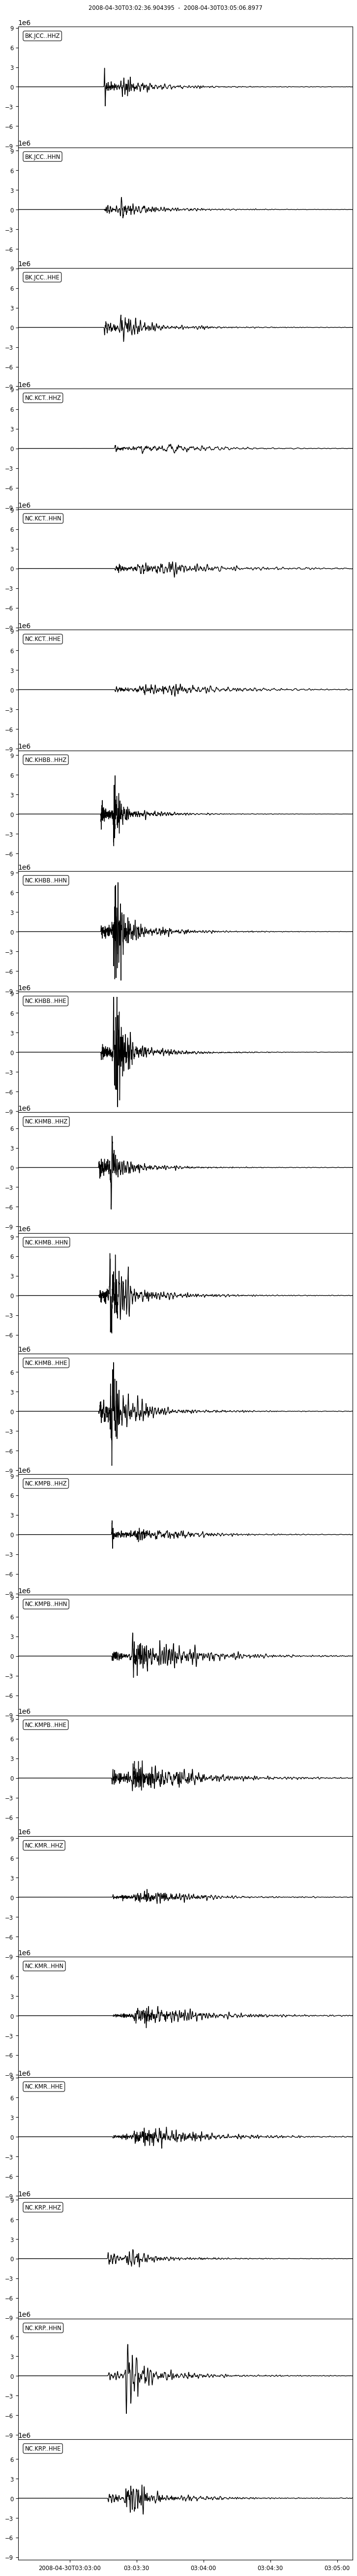

Total success: 7 out of 148 stations


In [7]:
# ============ read inventory ============
# inventory = read_inventory(f"{output_folder}/merged_inventory_{event_id}.xml")
inventory = merged_inventory
# ========================================

# ============get waveforms===========
# Get waveforms
st = Stream()
success_stn = []
success_counter = 0
print(f"succes_stn: {success_stn}")
priority_channels = ['HH*', 'BH*', 'HN*', 'EH*']

#loop over Datacenters
for i, client_name in enumerate(client_list):
    client = Client(client_name, debug=False, timeout=3600)
    print(f"Fetching data from {client_list[i]}...")
    networks = inventory.get_contents()['networks']
    print(f"networks: {networks}")
    for i, network in enumerate(networks):
        network=network
        print(f"current network: {network}")
        # get stations in the current network
        stations = inventory.networks[i].stations

        # get the right channels
        success_counter = 0
        for j, station_content in enumerate(stations):    #range(len(inventory.networks[i].stations)):
            # ============ station ============
            station = stations[j].code
            print(f"    current station: {station}")
            if station not in success_stn:
                print(f"{station} is not in {success_stn}")    
                channels = station_content.channels
                channels_list = [channel_content.code[0:2] for channel_content in channels]
                channels_list = list(set(channels_list)) # remove duplicates
                print(f"        channels_list: {channels_list} in {station}")

                # match the right channels
                priority = 1 
                for priority_channel in priority_channels:
                    if priority_channel[0:2] not in channels_list:
                        print(f"        {priority_channel[0:2]} is not in {channels_list}")
                        continue
                    else:
                        print(f"        {priority_channel} is in {channels_list}")
                        channel = priority_channel
                        # now that we have the right channel, get the waveform
                        try:
                            temp_st = client.get_waveforms(
                                network=network,
                                station=station,
                                location="*",
                                channel=channel,
                                starttime=starttime,
                                endtime=endtime
                                )
                            success_counter += 1
                            print(f"st = client.get_waveforms(network={network}, station={station}, location='*', channel={channel}, starttime={starttime}, endtime={endtime})")
                            st += temp_st
                            # download station information into stationtxt file
                            try: 
                                inv = client.get_stations(
                                    network=network,
                                    station=station,
                                    location="*",
                                    channel=channel,
                                    starttime=starttime,
                                    endtime=endtime,
                                    level="response",
                                    )
                                # inv.write(f"{filename}_{client_name}.xml", format="STATIONXML")
                                success_stn.append(station)
                                break # since we already got the right channel, 
                                    #we don't need to loop through the rest of the priority channels
                            
                            except:
                                fid = open('failed_download.txt', 'a')
                                fid.close()
                        except:
                            print(f"        failed to get waveforms for {network}.{station}.{channel} from {client_name}.")
                    
            else:
                print(f"{station} is in {success_stn}")
                continue
#/////////////////////////////////////////////////////////////////////////////////////////
# plot the waveforms
st.plot()
# st.write(f"{output_folder}/{event_id}.mseed", format="MSEED")
print(f"Total success: {len(success_stn)} out of {len(inv_merged.get_contents()['stations'])} stations")

# check manually if automated process is successful or not